In [15]:
!unrar x "/content/drive/My Drive/Audio_Song_Actors_01-24.rar" "/content/drive/My Drive/"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/My Drive/Audio_Song_Actors_01-24.rar

Creating    /content/drive/My Drive/Audio_Song_Actors_01-24           OK
Extracting  /content/drive/My Drive/Audio_Song_Actors_01-24/03-02-01-01-01-01-01.wav       0%  OK 
Extracting  /content/drive/My Drive/Audio_Song_Actors_01-24/03-02-01-01-01-01-02.wav       0%  OK 
Extracting  /content/drive/My Drive/Audio_Song_Actors_01-24/03-02-01-01-01-01-03.wav       0%  OK 
Extracting  /content/drive/My Drive/Audio_Song_Actors_01-24/03-02-01-01-01-01-04.wav       0%  OK 
Extracting  /content/drive/My Drive/Audio_Song_Actors_01-24/03-02-01-01-01-01-05.wav       0%  OK 
Extracting  /content/drive/My Drive/Audio_Song_Actors_01-24/03-02-01-01-01-01-06.wav       0%  OK 
Extracting  /content/drive/My Drive/Audio_Song_Actors_01-24/03-02-01-01-01-01-07.wav       0%  OK 
Extracting  /content/drive/My Dri

In [18]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
from tensorflow import keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import pandas as pd
from tensorflow.keras import regularizers
import os

mylist= os.listdir('/content/drive/My Drive/Audio_Song_Actors_01-24/')
# 讀入音檔
print(mylist[400][18:-4])
# 前處理設立個音訊檔對應的label
# 建立出其音訊對應的結果
feeling_list=[]
for item in mylist:
    if item[18:-4]=='01':
        feeling_list.append('male')
    elif item[18:-4]=='02':
        feeling_list.append('female')
    elif item[18:-4]=='03':
        feeling_list.append('male')
    elif item[18:-4]=='04':
        feeling_list.append('female')
    elif item[18:-4]=='05':
        feeling_list.append('male')
    elif item[18:-4]=='06':
        feeling_list.append('female')
    elif item[18:-4]=='07':
        feeling_list.append('male')
    elif item[18:-4]=='08':
        feeling_list.append('female')
    elif item[18:-4]=='09':
        feeling_list.append('male')
    elif item[18:-4]=='10':
        feeling_list.append('female')
    elif item[18:-4]=='12':
        feeling_list.append('female')
    elif item[18:-4]=='13':
        feeling_list.append('male')
    elif item[18:-4]=='14':
        feeling_list.append('female')
    elif item[18:-4]=='15':
        feeling_list.append('male')
    elif item[18:-4]=='16':
        feeling_list.append('female')
    elif item[18:-4]=='17':
        feeling_list.append('male')
    elif item[18:-4]=='19':
        feeling_list.append('male')
    elif item[18:-4]=='21':
        feeling_list.append('male')
    elif item[18:-4]=='22':
        feeling_list.append('female')
    elif item[18:-4]=='23':
        feeling_list.append('male')

labels = pd.DataFrame(feeling_list)

df = pd.DataFrame(columns=['feature'])
bookmark=0

# Getting the features of audio files using librosa¶(使用librosa去處理聲音特徵)
# 使用mfcc特徵擷取好處 可以在多個領域中使聲音訊號有更好的表示 它比用於正常的對數倒頻譜中的線性間隔的頻帶更能近似人類的聽覺系統
for index,y in enumerate(mylist):
    X, sample_rate = librosa.load('/content/drive/My Drive/Audio_Song_Actors_01-24/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs   
    df.loc[bookmark] = [feature]
    bookmark=bookmark+1



df3 = pd.DataFrame(df['feature'].values.tolist())

# ndarray.tolist() 對ndarry做遞歸降維 1維則不變
newdf = pd.concat([df3,labels], axis=1)
# concat() 將df3跟labels整合 預設axis=0

rnewdf = newdf.rename(index=str, columns={"0": "label"})

# shuffle() 洗牌 將陣列打亂
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)

rnewdf=rnewdf.fillna(0)

# Dividing the data into test and train¶
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]

01


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[[-55.62935052]
  [-55.62935052]
  [-55.62935052]
  ...
  [-41.48806692]
  [-24.48564759]
  [-16.73632646]]

 [[-44.5100623 ]
  [-44.5100623 ]
  [-44.5100623 ]
  ...
  [-35.02753645]
  [-33.12091884]
  [-27.19711235]]

 [[-51.95277295]
  [-51.48646464]
  [-52.42875833]
  ...
  [-42.39377162]
  [-28.07846171]
  [-21.02325125]]

 ...

 [[-55.23660762]
  [-53.85491216]
  [-53.20083022]
  ...
  [-26.82095586]
  [-20.2490968 ]
  [-15.4339101 ]]

 [[-46.04180682]
  [-46.50303841]
  [-45.53758132]
  ...
  [-42.03713817]
  [-24.54010869]
  [-16.88800122]]

 [[-50.89970656]
  [-51.53646959]
  [-51.35813862]
  ...
  [-26.65323868]
  [-22.43144431]
  [-17.73924685]]]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 216, 256)          1536      
_________________________________________________________________
activation (Activation)      (None, 216, 256)     

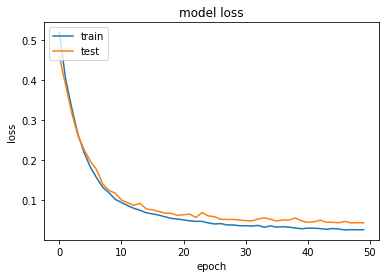

Saved trained model at /content/saved_models/Emotion_Voice_Detection_Model.h5 


In [19]:
from tensorflow.keras import utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()
y_train = utils.to_categorical(lb.fit_transform(y_train))
y_test = utils.to_categorical(lb.fit_transform(y_test))


x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)
print(x_traincnn)


# Changing dimension for CNN model
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))# 激活函數
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))# 正則化
model.add(MaxPooling1D(pool_size=(8))) # 池化
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

# Removed the whole training part for avoiding unnecessary long epochs list
cnnhistory=model.fit(x_traincnn, y_train, batch_size=32, epochs=50, validation_data=(x_testcnn, y_test))
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model_name = 'Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

In [23]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# # evaluate loaded model on test data
from tensorflow.keras.models import model_from_json

json_file = open('model.json', 'r')
# 讀入模型
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Voice_Detection_Model.h5")
# 讀入剛剛儲存之模型權重
print("Loaded model from disk")

loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

preds = np.argmax(loaded_model.predict(x_testcnn, batch_size=32, verbose=1), axis=-1)
print(preds)

Loaded model from disk
accuracy: 98.84%
6/6 [==============================] - 0s 39ms/step
[0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0
 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0
 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0
 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1
 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1]


In [25]:
np.argmax(y_test, axis=-1)

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])